In [1]:
import os
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Đường dẫn dữ liệu
split_dir = "../data/old_data/splits"
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# Đọc dữ liệu
X_train = pd.read_csv(f"{split_dir}/X_train.csv")
y_train = pd.read_csv(f"{split_dir}/y_train.csv")
X_test = pd.read_csv(f"{split_dir}/X_test.csv")
y_test = pd.read_csv(f"{split_dir}/y_test.csv")

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")


2024-11-29 14:04:46.699973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nguyendinhkhai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Kích thước tập train: (742826, 8)
Kích thước tập test: (93791, 8)


In [2]:
# Khởi tạo mô hình ANN
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Lớp đầu tiên
    Dropout(0.2),  # Dropout để giảm overfitting
    Dense(32, activation='relu'),  # Lớp thứ hai
    Dropout(0.2),
    Dense(16, activation='relu'),  # Lớp thứ ba
    Dense(1, activation='sigmoid')  # Lớp đầu ra
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model.summary()


/Users/nguyendinhkhai/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Cài đặt Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9811 - loss: 0.1483 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 2/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.9999 - val_loss: 0.0041
Epoch 3/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9982 - loss: 0.0078 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 4/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.9996 - val_loss: 0.0040
Epoch 5/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 6/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 7/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9986 - loss: 0.0063 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 8/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 

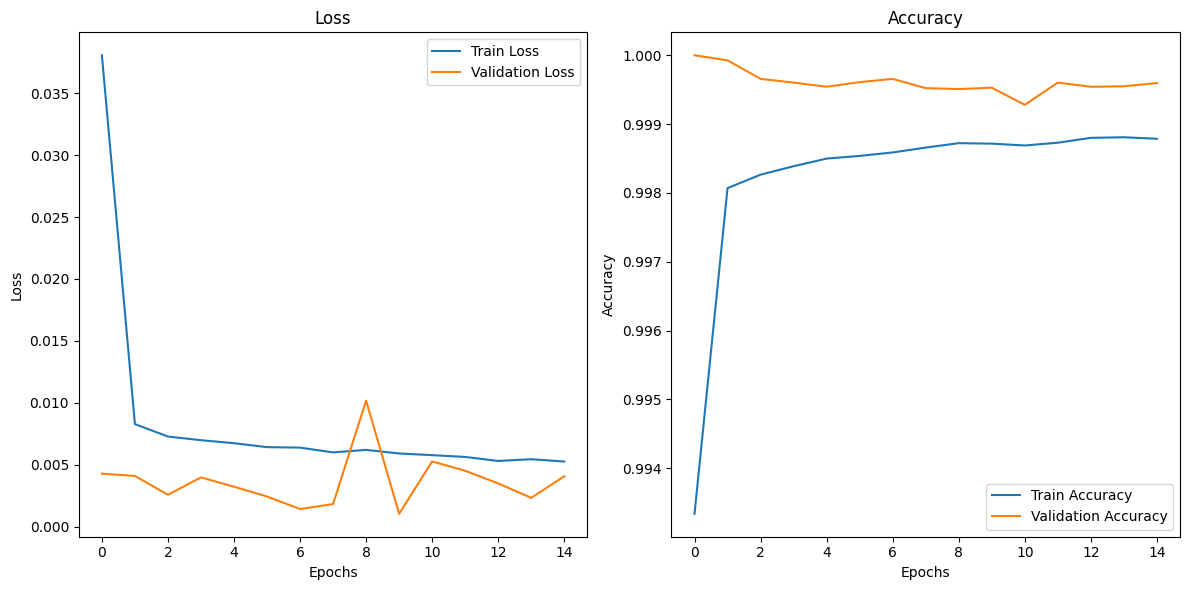

In [4]:
# Hiển thị lịch sử huấn luyện
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Biểu đồ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Lưu mô hình đã huấn luyện
model.save(f"{model_dir}/ann_model.keras")
print("Mô hình ANN đã được lưu tại: ann_model.keras")


Mô hình ANN đã được lưu tại: ann_model.keras
